## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [328]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [329]:
print(f"Number of empty (nan) cells: {X.isna().sum().sum()}")

Number of empty (nan) cells: 0


Категориальных переменных нет (у всех метрических переменных "большое" количество различных значений)

In [330]:
X.apply(lambda s: print(f"Column {s.name} has {s.nunique()} unique values"), axis=0);

Column alcohol has 126 unique values
Column malic_acid has 133 unique values
Column ash has 79 unique values
Column alcalinity_of_ash has 63 unique values
Column magnesium has 53 unique values
Column total_phenols has 97 unique values
Column flavanoids has 132 unique values
Column nonflavanoid_phenols has 39 unique values
Column proanthocyanins has 101 unique values
Column color_intensity has 132 unique values
Column hue has 78 unique values
Column od280/od315_of_diluted_wines has 122 unique values
Column proline has 121 unique values


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

Использовать аргумент stratify важно, чтобы при разбиении в множествах тестовой выборки и тренеровачной выборки распределение классов ответов соответствовало распределению классов ответов в исходных данных (например, если в тестовую выборку попадёт только один класс, то в таком случае самая эффективная модель - константа, которая выдаёт этот класс, но на реальных данных эта модель будет очень плохого качества)

In [331]:
pd.Series(y).value_counts()

1    71
0    59
2    48
Name: count, dtype: int64

In [332]:
from sklearn.model_selection import train_test_split
np.random.seed(31415)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [333]:
pd.Series(y_train).value_counts()

1    50
0    41
2    33
Name: count, dtype: int64

In [334]:
pd.Series(y_test).value_counts()

1    21
0    18
2    15
Name: count, dtype: int64

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [335]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [336]:
X_train_scaled = StandardScaler().fit_transform(X_train[["alcohol", "magnesium"]])
X_test_scaled = StandardScaler().fit_transform(X_test[["alcohol", "magnesium"]])
n_vals = pd.Series((1, 3, 5, 10, 15, 25))
classifiers = n_vals.apply(lambda n: KNeighborsClassifier(n_neighbors=n, metric="euclidean").fit(X_train_scaled, y_train))
train_predictions_acc = classifiers.apply(lambda c: np.mean(c.predict(X_train_scaled) == y_train))
test_predictions_acc = classifiers.apply(lambda c: np.mean(c.predict(X_test_scaled) == y_test))
pd.DataFrame({
    "NN": n_vals,
    "Train": train_predictions_acc,
    "Test": test_predictions_acc,
})

,NN,Train,Test
0,1,1.000000,0.611111
1,3,0.814516,0.592593
2,5,0.774194,0.574074
3,10,0.758065,0.703704
4,15,0.774194,0.648148
5,25,0.774194,0.629630


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [337]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [338]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

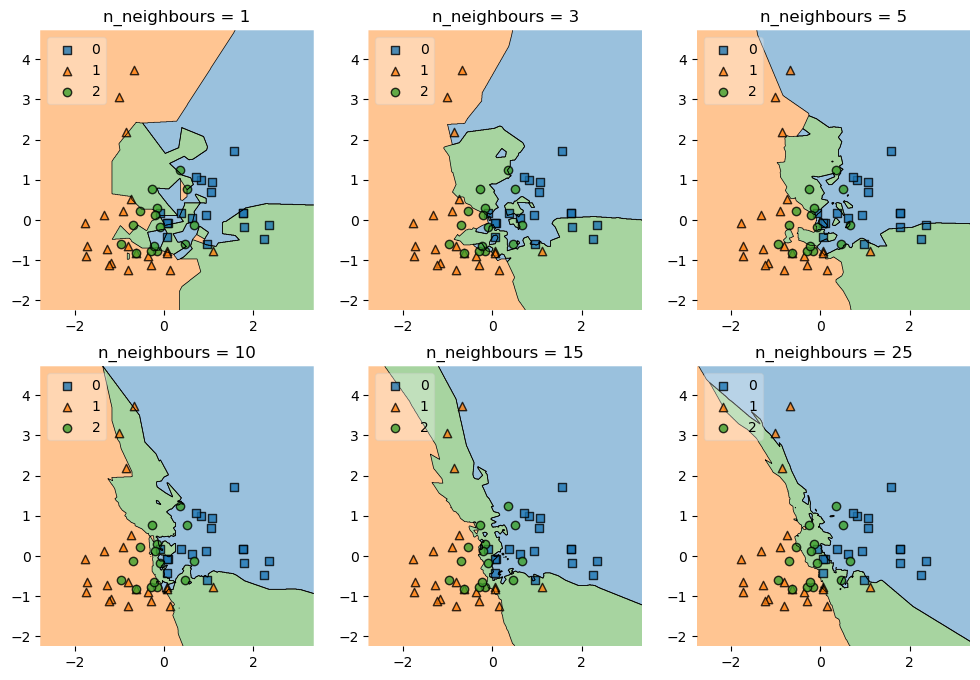

In [341]:
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import itertools

plt.figure(figsize=(12, 8))

gs = gridspec.GridSpec(2, len(n_vals) // 2)
for classifier, n, coords in zip(classifiers,
                         n_vals,
                         itertools.product((0, 1, 2), repeat=2),
                         strict=False):
    ax = plt.subplot(gs[coords])
    ax.set_title(f"n_neighbours = {n}")
    plot_decision_regions(X=X_test_scaled, y=y_test, clf=classifier, legend=2, ax=ax)

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

При "небольшом" числе соседей (в данном случае, при n_neighbours <= 5) модели подогнались под обучающую выборку, т.к. зелёная область - не непрерывное множество точек, которое "натягивается" на множество точек с классом 2.

На графиках при 10 <= n_neighbours <= 25 не видно явного переобучения, но при n >= 15 в некотором смысле "неправильно" определены классы для объектов в класса 1 выше прямой y = 1. Их модели отнесли к 0 / 2 классам, хотя "логичнее" было бы выделить эту область оранжевой, примерно как на графике с n_neighbours = 10.

Таким образом, для данного разбиения X_test / X_train оптимальное число соседей = 10 (или в некоторой окрестности 10, от 6 до 14, эти значения могут дать более точный результат, но не проверялись в задании)

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

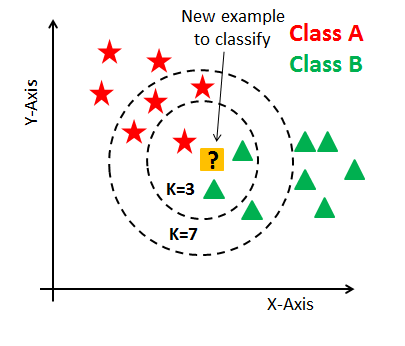

In [342]:
from collections import Counter

class KNN:
    def __init__(self, k: int):
        assert k > 0
        self.k = k

    def fit(self, X, y):
        self.__X = np.array(X)
        self.__y = np.array(y)
        assert len(self.__X) == len(self.__y)
        return self

    def predict(self, X):
        return np.apply_along_axis(
            lambda x_i: Counter(self.__y[self.count_distance(self.__X, x_i).argsort().view()[:self.k]]).most_common(1)[0][0],
            axis=1, 
            arr=X)

    def count_distance(self, x, y):
        return np.linalg.norm(x - y, axis=1)

In [343]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [344]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [345]:
import os
for path in ("data/diamonds.csv", "./diamonds.csv", "./data/diamonds.csv", "diamonds.csv"):
    if os.path.exists(path):
        data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

Пропущенных значений нет:

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Бессмысленный столбец:

In [347]:
assert np.all(data.index + 1 == data["Unnamed: 0"])
data["Unnamed: 0"]

0            1
1            2
2            3
3            4
4            5
         ...  
53935    53936
53936    53937
53937    53938
53938    53939
53939    53940
Name: Unnamed: 0, Length: 53940, dtype: int64

In [348]:
data.drop(columns="Unnamed: 0", inplace=True)

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [349]:
metric_vars = ["carat", "depth", "table", "x", "y", "z"]
data[metric_vars + ["price"]]\
    .corr()\
    .style\
    .background_gradient(cmap='coolwarm')

,carat,depth,table,x,y,z,price
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


Переменные, у которых наибольшие по модулю значения коэффициентов корреляции с переменной price:

In [350]:
corr_table = data[metric_vars + ["price"]].corr()
high_corr_cols = corr_table[abs(corr_table.price) >= 0.5]["price"].to_frame()
high_corr_cols.columns = ["correlation coefficient with 'price'"]
# corr(price, price) = 1 >= 0.5
high_corr_cols.drop("price", axis=0, inplace=True)
if not high_corr_cols.empty:
    display(high_corr_cols)

,correlation coefficient with 'price'
carat,0.921591
x,0.884435
y,0.865421
z,0.861249


**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

От выполнявшего задание:

На лекции Евгений Андреевич сказал, что можно не убирать референтную группу при one hot-кодировании (например, при добавлении регуляризации) (поэтому здесь мы оставим все новые дамми переменные, полученные из категориальных, хотя в некоторых случаях для каждой категориальной переменной можно не добавлять в датасет одну из её дамми переменных)

In [351]:
data = pd.get_dummies(data, columns=["cut", "color", "clarity"], drop_first=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  bool   
 8   cut_Good       53940 non-null  bool   
 9   cut_Ideal      53940 non-null  bool   
 10  cut_Premium    53940 non-null  bool   
 11  cut_Very Good  53940 non-null  bool   
 12  color_D        53940 non-null  bool   
 13  color_E        53940 non-null  bool   
 14  color_F        53940 non-null  bool   
 15  color_G        53940 non-null  bool   
 16  color_H        53940 non-null  bool   
 17  color_I        53940 non-null  bool   
 18  color_

In [352]:
data.head(2)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

Сопоставим каждой цене свой класс, чтобы при разбиении функцией train_test_split получилось относительно равномерное распределение цен в train и test

В качестве количестве временных классов для цены выберем значение формулы Стёрджеса:

$$
n = 1 + \lfloor \log_2 N \rfloor
$$

Границы для классов выберем как квантили цен (всего n - 1 квантилей для разбиения множества значений цены на n попарно непересекающихся полуинтервалов)

Таким образом, массив временно созданных классов цен будет аргументом параметра `stratify`

In [353]:
from sklearn.preprocessing import KBinsDiscretizer

n_bins = 1 + int(np.log2(len(data)))
data["tmp_price_class"] = KBinsDiscretizer(n_bins=n_bins, encode="ordinal").fit_transform(data[["price"]])[:, 0]

In [354]:
print("Distribution of the price classes:")
data.tmp_price_class.value_counts()

Distribution of the price classes:


tmp_price_class
3.0     3410
5.0     3383
8.0     3377
10.0    3374
11.0    3373
15.0    3373
6.0     3373
9.0     3372
13.0    3371
14.0    3371
12.0    3370
0.0     3364
1.0     3364
4.0     3360
7.0     3360
2.0     3345
Name: count, dtype: int64

In [355]:
X = data.drop(columns="price", inplace=False)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X["tmp_price_class"], random_state=314)

В тренеровачной и тестовой выборках получилось относительно одинаковое распределения таргета (price)

In [356]:
X_train["tmp_price_class"].value_counts()

tmp_price_class
3.0     2387
5.0     2368
8.0     2364
10.0    2362
15.0    2361
11.0    2361
6.0     2361
9.0     2360
14.0    2360
13.0    2360
12.0    2359
0.0     2355
1.0     2355
4.0     2352
7.0     2352
2.0     2341
Name: count, dtype: int64

In [357]:
X_test["tmp_price_class"].value_counts()

tmp_price_class
3.0     1023
5.0     1015
8.0     1013
10.0    1012
15.0    1012
11.0    1012
9.0     1012
6.0     1012
12.0    1011
14.0    1011
13.0    1011
1.0     1009
0.0     1009
7.0     1008
4.0     1008
2.0     1004
Name: count, dtype: int64

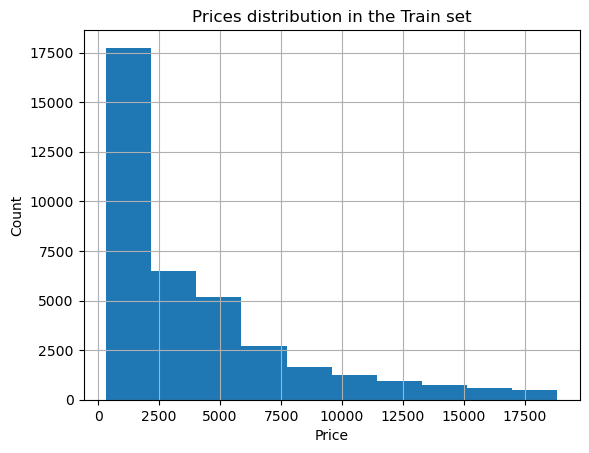

In [358]:
ax = y_train.hist()
ax.set_title("Prices distribution in the Train set")
ax.set_xlabel("Price")
ax.set_ylabel("Count")
plt.show()

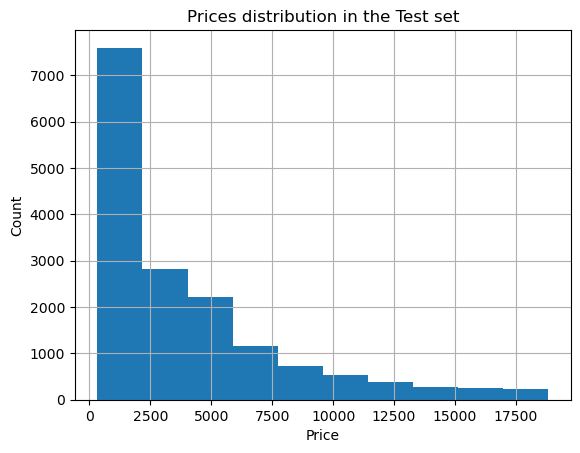

In [359]:
ax = y_test.hist()
ax.set_title("Prices distribution in the Test set")
ax.set_xlabel("Price")
ax.set_ylabel("Count")
plt.show()

Удалим временный столбец с классами цен

In [360]:
X_train.drop(columns="tmp_price_class", inplace=True)
X_test.drop(columns="tmp_price_class", inplace=True)

In [361]:
X_train.head(2)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
8438,1.23,58.9,62.0,7.03,6.97,4.12,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
38373,0.51,62.5,58.0,5.11,5.13,3.20,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False


**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [362]:
X_train_copy = X_train.copy(deep=True)
X_test_copy = X_test.copy(deep=True)

In [363]:
scaler = StandardScaler().fit(data[metric_vars])
X_train[metric_vars] = scaler.transform(X_train[metric_vars])
X_test[metric_vars] = scaler.transform(X_test[metric_vars])

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

Возможно, первое слово в условии задания было "Постройте"?

In [364]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("MSE for the default linear regression on the train set:")
print(mean_squared_error(linear_model.predict(X_train), y_train))
print("MSE for the default linear regression on the test set:")
print(mean_squared_error(linear_model.predict(X_test), y_test))

MSE for the default linear regression on the train set:
1297501.7272688695
MSE for the default linear regression on the test set:
1229513.8059151263


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [365]:
df = pd.DataFrame({
    "Feature name": linear_model.feature_names_in_,
    "Coefficient": linear_model.coef_,
    "Coefficient abs": np.abs(linear_model.coef_)
})
df.set_index("Feature name", drop=True, inplace=True)
df.sort_values(by="Coefficient abs", inplace=True, ascending=False)
df

,Coefficient,Coefficient abs
Feature name,,
carat,5281.552080,5281.552080
clarity_I1,-3939.783893,3939.783893
color_J,-1562.698998,1562.698998
clarity_IF,1540.770365,1540.770365
clarity_VVS1,1219.112155,1219.112155
clarity_VVS2,1150.920234,1150.920234
clarity_SI2,-1098.832063,1098.832063
x,-1079.477087,1079.477087
color_D,831.348843,831.348843


Вещественные переменные трейн датасета, оценки коэффициентов которых по модулю на порядок (в 10-чной системе счисления) превышают оценки прочих вещественных переменных:

In [366]:
from scipy import stats

coeff_abs_magnitude_order = np.floor(np.log10(df["Coefficient abs"])).astype(np.uint32)
df[coeff_abs_magnitude_order > stats.mode(coeff_abs_magnitude_order).mode]

,Coefficient,Coefficient abs
Feature name,,
carat,5281.552080,5281.552080
clarity_I1,-3939.783893,3939.783893
color_J,-1562.698998,1562.698998
clarity_IF,1540.770365,1540.770365
clarity_VVS1,1219.112155,1219.112155
clarity_VVS2,1150.920234,1150.920234
clarity_SI2,-1098.832063,1098.832063
x,-1079.477087,1079.477087


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [367]:
from sklearn.linear_model import Lasso, Ridge

alpha = 10
lasso_model = Lasso(alpha=alpha, random_state=314).fit(X_train, y_train)

df = pd.DataFrame({
    "Feature name": lasso_model.feature_names_in_,
    "Coefficient": lasso_model.coef_,
    "Coefficient abs": np.abs(lasso_model.coef_)
})
df.set_index("Feature name", drop=True, inplace=True)
df.sort_values(by="Coefficient abs", inplace=True, ascending=False)
df

,Coefficient,Coefficient abs
Feature name,,
carat,4780.934587,4780.934587
clarity_I1,-3717.716264,3717.716264
color_J,-1660.135998,1660.135998
clarity_SI2,-1540.792029,1540.792029
color_I,-845.909151,845.909151
clarity_IF,679.955669,679.955669
x,-651.102772,651.102772
clarity_SI1,-630.108177,630.108177
clarity_VVS1,521.253852,521.253852


In [368]:
ridge_model = Ridge(alpha=alpha, random_state=314).fit(X_train, y_train)

df = pd.DataFrame({
    "Feature name": ridge_model.feature_names_in_,
    "Coefficient": ridge_model.coef_,
    "Coefficient abs": np.abs(ridge_model.coef_)
})
df.set_index("Feature name", drop=True, inplace=True)
df.sort_values(by="Coefficient abs", inplace=True, ascending=False)
df

,Coefficient,Coefficient abs
Feature name,,
carat,5240.687567,5240.687567
clarity_I1,-3866.248200,3866.248200
color_J,-1551.401184,1551.401184
clarity_IF,1521.190395,1521.190395
clarity_VVS1,1206.892872,1206.892872
clarity_VVS2,1140.163221,1140.163221
clarity_SI2,-1102.646507,1102.646507
x,-1036.380454,1036.380454
color_D,826.481841,826.481841


**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

e:\Programs\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.385e+07, tolerance: 5.998e+07
  model = cd_fast.enet_coordinate_descent(


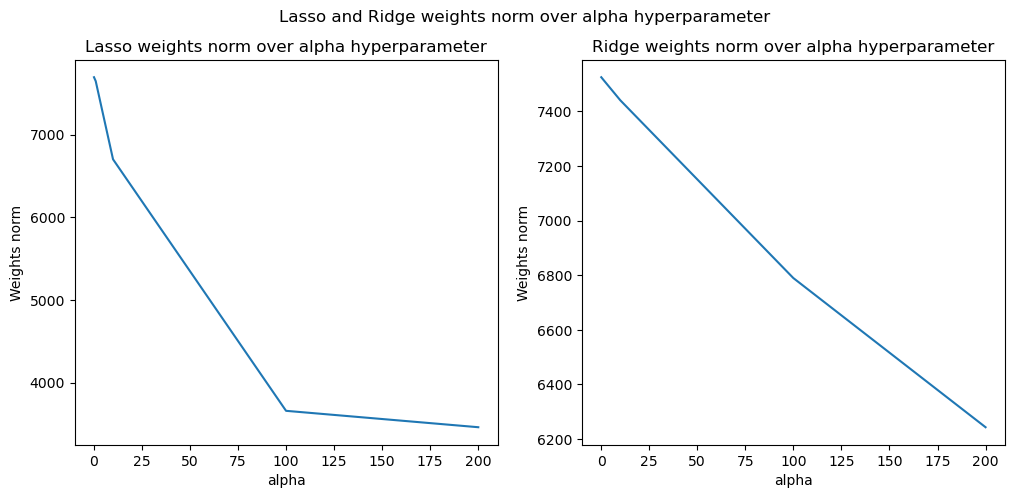

In [369]:
alpha_vals = np.array([0.1, 1, 10, 100, 200])
lasso_norms = np.array(list(map(lambda alpha: np.linalg.norm(Lasso(alpha).fit(X_train, y_train).coef_), alpha_vals)))
ridge_norms = np.array(list(map(lambda alpha: np.linalg.norm(Ridge(alpha).fit(X_train, y_train).coef_), alpha_vals)))

fig = plt.figure(figsize=(12, 5))
fig.suptitle("Lasso and Ridge weights norm over alpha hyperparameter")
gs = fig.add_gridspec(nrows=1,
                      ncols=2,
                      width_ratios=(1, 1))
ax_lasso = fig.add_subplot(gs[0, 0])
ax_ridge = fig.add_subplot(gs[0, 1])

ax_lasso.set_title("Lasso weights norm over alpha hyperparameter")
ax_lasso.set_ylabel("Weights norm")
ax_lasso.set_xlabel("alpha")
ax_lasso.plot(alpha_vals, lasso_norms)

ax_ridge.set_title("Ridge weights norm over alpha hyperparameter")
ax_ridge.set_ylabel("Weights norm")
ax_ridge.set_xlabel("alpha")
ax_ridge.plot(alpha_vals, ridge_norms)

plt.show()

Метод Lasso агрессивнее уменьшает веса и может занулить незачимые переменные (Ridge тоже может занулить коэффициенты, но это происходит с меньшей вероятностью, чем у Lasso), поэтому для отбора значащих (и детекции незначащих) признаков лучше использовать Lasso-регрессию

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [370]:
from sklearn.linear_model import LassoCV

def min_mse_over_alphas(alphas: np.ndarray):
    lasso_cv_model = LassoCV(cv=5, alphas=alphas, random_state=314).fit(X_train, y_train)
    mse_means = lasso_cv_model.mse_path_.mean(axis=1)
    return lasso_cv_model.alphas_[mse_means.argmin()], mse_means.min()

print("Approximate alphas ​​with \"large\" step:")
print("\toptimal alpha = {0}\n\tmean mse = {1}\n".format(*min_mse_over_alphas(np.arange(0.5, 500.5, 0.5))))

lasso_alpha, min_mean_mse = min_mse_over_alphas(np.arange(0.4, 2, 0.001))
print("A bit more precise alphas in the neighborhood of 1:")
print("\toptimal alpha = {0}\n\tmean mse = {1}".format(lasso_alpha, min_mean_mse))

Approximate alphas ​​with "large" step:
	optimal alpha = 1.0
	mean mse = 1301230.170866812

A bit more precise alphas in the neighborhood of 1:
	optimal alpha = 0.6680000000000003
	mean mse = 1301025.846706946


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [371]:
lasso_model = Lasso(alpha=lasso_alpha, random_state=314).fit(X_train, y_train)

df = pd.DataFrame({
    "Feature name": lasso_model.feature_names_in_,
    "Coefficient": lasso_model.coef_,
    "Coefficient abs": np.abs(lasso_model.coef_)
})
df.set_index("Feature name", drop=True, inplace=True)
df.sort_values(by="Coefficient abs", inplace=True, ascending=False)
df

,Coefficient,Coefficient abs
Feature name,,
carat,5248.065319,5248.065319
clarity_I1,-4451.098949,4451.098949
color_J,-1887.608125,1887.608125
clarity_SI2,-1654.665698,1654.665698
x,-1051.521541,1051.521541
color_I,-970.577023,970.577023
clarity_IF,957.000590,957.000590
cut_Fair,-692.118943,692.118943
clarity_SI1,-687.258535,687.258535


Наиболее информативные признаки:
- Увеличивающие цену бриллианта:
    - carat - масса бриллианта. 
    
        Чем больше масса, тем выше цена
    - clarity_IF - самый высокий уровень 'чистоты' бриллианта. 
    
        Чем выше уровень чистоты, тем выше цена
- Уменьшающие цену бриллианта:
    - clarity_I1 - самый низкий уровень 'чистоты' бриллианта. 
    
        Чем ниже уровень чистоты, тем ниже цена
    - color_J - самый плохой цвет бриллианта. 
    
        Чем 'ранг' цвета ниже, тем ниже цена
    - clarity_SI2 - почти самый низкий уровень 'чистоты' бриллианта (после I1). 
    
        Чем ниже уровень чистоты, тем ниже цена
    - x - длина бриллианта. 
        
        Возможно, слишком длинные бриллианты имеют 'непривлекательную' форму поверхности и поэтому спрос на них ниже (=> ниже и цена)
    - color_I - почти самый плохой цвет бриллианта. 
    
        Чем 'ранг' цвета ниже, тем ниже цена

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [393]:
print(f"Default linear model mse:\n\t{mean_squared_error(linear_model.predict(X_test), y_test)}")
print(f"Linear model with lasso reguralisation mse:\n\t{mean_squared_error(lasso_model.predict(X_test), y_test)}")

Default linear model mse:
	1229513.8059151263
Linear model with lasso reguralisation mse:
	1229616.947623827


В данном случае стандартная линейная модель и модель Lasso-регресии имеют достаточно "близкую" ошибку.

Скорее всего, это связано с тем, что значения коэффициентов этих моделей "близки" по модулю (модель с Lasso регуляризацией обнулила незначимые переменные, но они также имеют "небольшие" по модулю значения и в моделе стандартной линейной регрессии).

Т.е. способность модели с регуляризацией занулять незначащие коэффициенты и ограничивать веса, не давая модели переобучаться, в данном случае не дала большого улучшения качества модели, т.к. с этой задачей относительно неплохо справилась и обычная линейная модель.